# Window Blinds Control with PID and Random Forest

## Import Dependencies

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Data Generation

### Step 1: Generate Blinds Angle Data and Time of Day Data¶

In [36]:
np.random.seed(42)
data_size = 1000
blinds_angle = np.random.uniform(0, 90, data_size)
time_of_day = np.random.uniform(0, 24, data_size)  # Simulate 24-hour period

### Step 2: Generate Lux Data

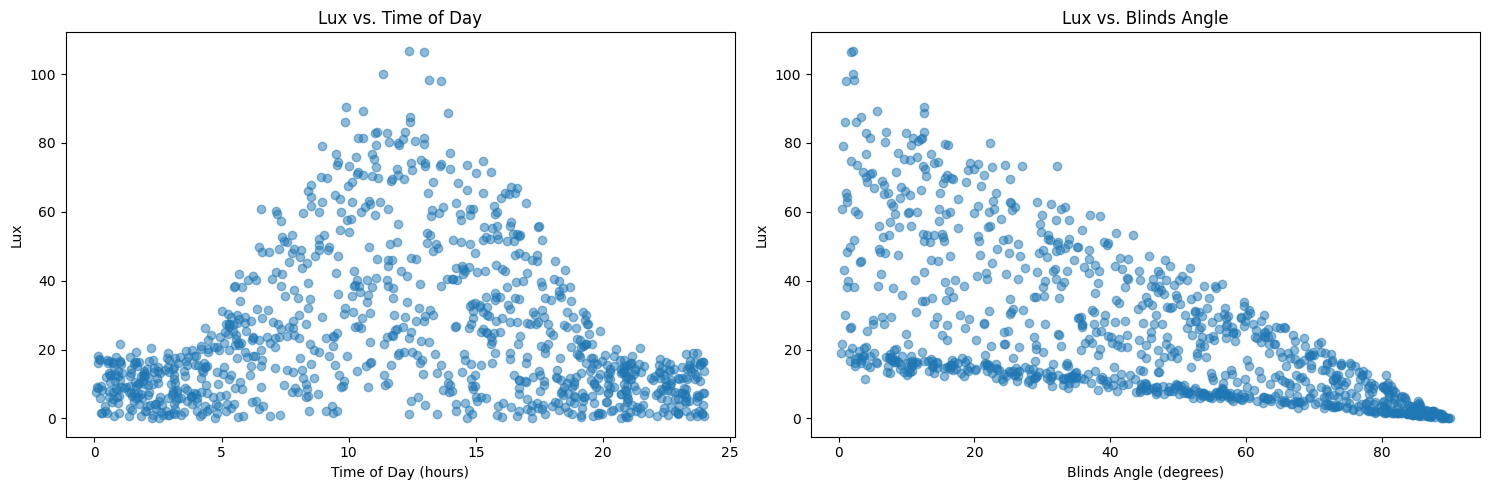

In [37]:
# Constant
day_start=6
day_end=18
night_value=0.2

# Normalize the time of day to a range of [0, 24)
time_of_day = time_of_day % 24

# Define the midpoint of the day and night
day_midpoint = (day_start + day_end) / 2
night_midpoint = (day_end + 24 + day_start) / 2 if day_start > day_end else (day_end + day_start) / 2

# Scale factors to adjust the smooth transition periods
day_duration = day_end - day_start
night_duration = 24 - day_duration

# Smooth day factor using a cosine function centered at the day midpoint
day_factor = np.where(
    (time_of_day >= day_start) & (time_of_day <= day_end),
    0.5 * (1 + np.cos((time_of_day - day_midpoint) * np.pi / day_duration)),
    night_value
)

# Smooth transition for evening and morning using cosine function
night_transition = np.where(
    (time_of_day > day_end) | (time_of_day < day_start),
    0.5 * (1 + np.cos((time_of_day - night_midpoint) * np.pi / night_duration)),
    0
)

# Combine day factor
lux_factor = np.maximum(day_factor, night_transition)

# calculate lux
lux = 100 * (1 - blinds_angle / 90) * lux_factor * np.random.normal(0.9, 0.1, data_size)

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(time_of_day, lux, alpha=0.5)
plt.xlabel('Time of Day (hours)')
plt.ylabel('Lux')
plt.title('Lux vs. Time of Day')

plt.subplot(1, 2, 2)
plt.scatter(blinds_angle, lux, alpha=0.5)
plt.xlabel('Blinds Angle (degrees)')
plt.ylabel('Lux')
plt.title('Lux vs. Blinds Angle')

plt.tight_layout()
plt.show()

### Step 3: Generate Temperature Data

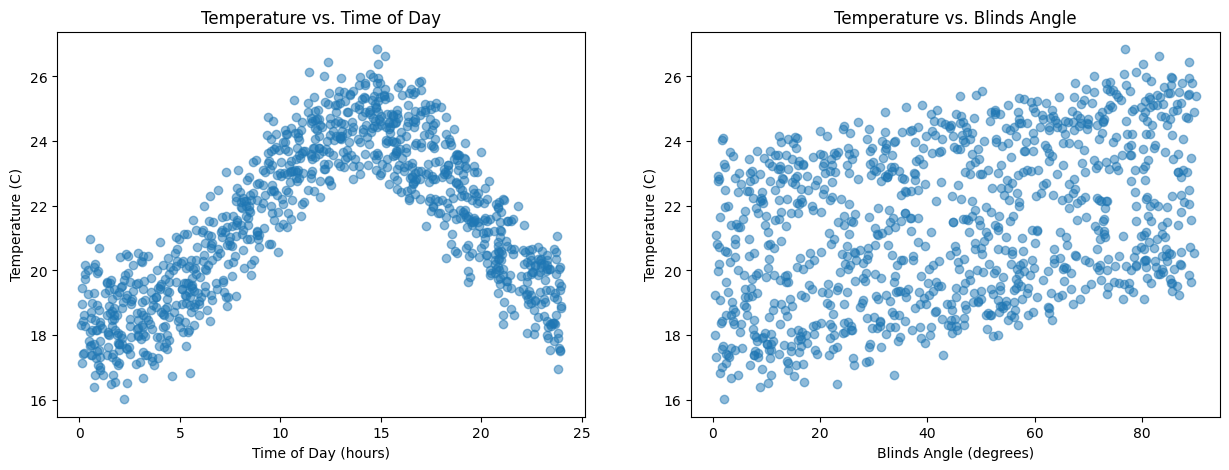

<Figure size 640x480 with 0 Axes>

In [38]:
# Constant
base_temp = 20
peak_time = 14

# Temperature variation due to the time of day
temp_factor = np.cos((time_of_day - peak_time) * np.pi / 12)
    
# Adjusting the effect of blinds angle
blinds_effect = 3 * (blinds_angle / 90)

 # Adding some random noise
random_variation = np.random.normal(0, 0.5, data_size)

# Calculating the temperature
temperature = base_temp + 3 * temp_factor + blinds_effect + random_variation

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(time_of_day, temperature, alpha=0.5)
plt.xlabel('Time of Day (hours)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs. Time of Day')

plt.subplot(1, 2, 2)
plt.scatter(blinds_angle, temperature, alpha=0.5)
plt.xlabel('Blinds Angle (degrees)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs. Blinds Angle')
plt.show()

plt.tight_layout()
plt.show()

### Step 4: Export csv

In [28]:
data = pd.DataFrame({
    'light_intensity': lux,
    'temperature': temperature,
    'time': time_of_day,
    'angle': blinds_angle
})

# Display DataFrame
data.head()

,light_intensity,temperature,time,angle
0,15.331905,19.652145,4.443190,33.708611
1,3.958781,25.945867,13.005623,85.564288
2,4.702714,21.022843,20.950700,65.879455
3,20.892595,23.843506,17.573397,53.879264
4,27.278099,19.652449,19.357468,14.041678


In [29]:
csv_path = "room_blinds.csv"
data.to_csv(csv_path, index=False)